## **Viticulture Regions of the UK**
#### This notebook cleans the data for Visulsiation 6: Regions of Viticulture
#### The visulisation can be looked at https://agelanyi.github.io/climate-and-uk-wine/website-frontend/#eighthSection
#### Counties shapefile sourced from [UK Government Data Portal](https://data.gov.uk/dataset/11302ddc-65bc-4a8f-96a9-af5c456e442c/counties-and-unitary-authorities-december-2016-full-clipped-boundaries-in-england-and-wales)

In [1]:
# Import in packages

import pandas as pd
import geopandas as gpd 
import os 

In [42]:
# Read in shapefile of counties - sourced from 

counties = gpd.read_file(os.path.join("Shapefiles","Map_UK.shp"))

<AxesSubplot:>

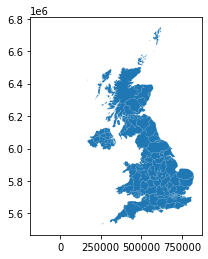

In [3]:
# Check the plot - note only for UK, so vineyards in Ireland are excluded

counties.plot()

In [4]:
# Examine the dataframe

counties

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,VARNAME_2,NL_NAME_2,HASC_2,CC_2,TYPE_2,ENGTYPE_2,VALIDFR_2,VALIDTO_2,REMARKS_2,Shape_Leng,Shape_Area,geometry
0,80,GBR,United Kingdom,1030,England,13936,Barking and Dagenham,None,None,GB.BA,None,London Borough,London Borough,None,Present,None,0.368272,0.004932,"POLYGON ((719316.591 5716960.249, 719365.616 5..."
1,80,GBR,United Kingdom,1030,England,13937,Bath and North East Somerset,None,None,GB.BN,None,Unitary Authority,Unitary Authority,19960401,Present,None,1.146163,0.039882,"POLYGON ((550019.968 5696813.117, 550299.618 5..."
2,80,GBR,United Kingdom,1030,England,13938,Bedfordshire,None,None,GB.BD,None,Administrative County,Administrative County,~1989,Present,None,2.158565,0.147815,"POLYGON ((679380.073 5794077.687, 679674.028 5..."
3,80,GBR,United Kingdom,1030,England,13939,Berkshire,None,None,GB.BK,None,County,County,Between 1900 and 1974,Present,non-metropolitan county with no county council,2.825418,0.158283,"POLYGON ((658761.890 5714402.155, 659890.480 5..."
4,80,GBR,United Kingdom,1030,England,13940,Bexley,None,None,GB.XB,None,London Borough,London Borough,None,Present,None,0.452624,0.008851,"POLYGON ((721667.295 5708401.122, 721818.676 5..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,80,GBR,United Kingdom,1033,Wales,14123,"Rhondda, Cynon, Taff",None,None,GB.RT,None,Unitary Authority (wales),Unitary Authority (wales,19960401,Present,None,1.190246,0.057106,"POLYGON ((470005.732 5740737.576, 471507.825 5..."
188,80,GBR,United Kingdom,1033,Wales,14124,Swansea,None,None,GB.SW,None,Unitary Authority (wales),Unitary Authority (wales,19960401,Present,None,1.767350,0.049196,"MULTIPOLYGON (((408221.113 5713627.919, 408220..."
189,80,GBR,United Kingdom,1033,Wales,14125,Torfaen,None,None,GB.TF,None,Unitary Authority (wales),Unitary Authority (wales,19960401,Present,None,0.615825,0.017151,"POLYGON ((498508.923 5730738.142, 499635.009 5..."
190,80,GBR,United Kingdom,1033,Wales,14126,Vale of Glamorgan,None,None,GB.VG,None,Unitary Authority (wales),Unitary Authority (wales,19960401,Present,None,1.256652,0.037682,"MULTIPOLYGON (((492705.708 5687810.079, 492705..."


In [5]:
# Look at the names of counties, as some in the Vineyards dataframe will be different (ie BANES or Bath and North East Somerset)
x = counties.sort_values("NAME_2")
y = x[['NAME_2']].copy()

In [6]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(y)

                           NAME_2
138                      Aberdeen
139                 Aberdeenshire
170                      Anglesey
140                         Angus
112                        Antrim
113                          Ards
141               Argyll and Bute
114                        Armagh
115                     Ballymena
116                    Ballymoney
117                     Banbridge
0            Barking and Dagenham
1    Bath and North East Somerset
2                    Bedfordshire
118                       Belfast
3                       Berkshire
4                          Bexley
5           Blackburn with Darwen
171                 Blaenau Gwent
6                     Bournemouth
7                           Brent
172                      Bridgend
8               Brighton and Hove
9                         Bristol
10                        Bromley
11                Buckinghamshire
173                    Caerphilly
12                 Cambridgeshire
13            

In [38]:
# Read in vineyards data - for ease, this has already been aggregated by using a pivot table in Excel, and the names cleaned to match the counties 
# shapefile

counties_area = pd.read_csv(os.path.join("https://raw.githubusercontent.com/agelanyi/climate-and-uk-wine/main/07-UK-Vineyard-Regions/Data/County_Area.csv"))

In [11]:
counties_area.columns

Index(['Unnamed: 0', 'NAME_2', 'Sum of Ha of planted vines',
       'Number of Vineyards'],
      dtype='object')

In [12]:
# Merge the dataframes

df = pd.merge(counties, counties_area, how="outer", on="NAME_2")

In [13]:
# Check the shapes are the same - ie no counties dropped

print("Merged shape: " + str(df.shape))
print("County shape: " + str(counties.shape))
print("Hectres shape: " + str(counties_area.shape))

Merged shape: (193, 22)
County shape: (192, 19)
Hectres shape: (193, 4)


In [15]:
# There should be 128 NaN values, so need to merge duplicates

df.isna().sum()

ID_0                            1
ISO                             1
NAME_0                          1
ID_1                            1
NAME_1                          1
ID_2                            1
NAME_2                          1
VARNAME_2                     158
NL_NAME_2                     193
HASC_2                          1
CC_2                          193
TYPE_2                          1
ENGTYPE_2                       1
VALIDFR_2                      34
VALIDTO_2                       1
REMARKS_2                     192
Shape_Leng                      1
Shape_Area                      1
geometry                        1
Unnamed: 0                      1
Sum of Ha of planted vines      1
Number of Vineyards             0
dtype: int64

In [16]:
# Check all can be plotted
df1 = df[df["geometry"].isna()]

In [17]:
df1

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,VARNAME_2,NL_NAME_2,HASC_2,...,ENGTYPE_2,VALIDFR_2,VALIDTO_2,REMARKS_2,Shape_Leng,Shape_Area,geometry,Unnamed: 0,Sum of Ha of planted vines,Number of Vineyards
192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,852


In [18]:
# Filter out any Ireland counties, as not included in the shapefile

ireland = ["Cork","County Mayo","County Tipperary", "County Waterford","Dublin","Yorkshire"]

df = df[~df.NAME_2.isin(ireland)]

In [19]:
# Fill NaN values with 0

df["Sum of Ha of planted vines"] = df["Sum of Ha of planted vines"].fillna(0)

In [20]:
df.columns

Index(['ID_0', 'ISO', 'NAME_0', 'ID_1', 'NAME_1', 'ID_2', 'NAME_2',
       'VARNAME_2', 'NL_NAME_2', 'HASC_2', 'CC_2', 'TYPE_2', 'ENGTYPE_2',
       'VALIDFR_2', 'VALIDTO_2', 'REMARKS_2', 'Shape_Leng', 'Shape_Area',
       'geometry', 'Unnamed: 0', 'Sum of Ha of planted vines',
       'Number of Vineyards'],
      dtype='object')

In [30]:
# Filter columns 

df2 = df[['NAME_1', 'NAME_2','geometry', "Sum of Ha of planted vines","Number of Vineyards"]].copy()

<AxesSubplot:>

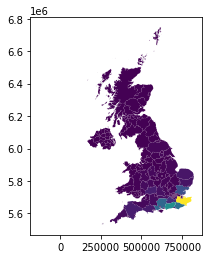

In [31]:
# Check plot

df2.plot(column="Sum of Ha of planted vines")

In [32]:
# Look at the largest vineyard regions

x = (df2["Sum of Ha of planted vines"].sort_values(ascending=False))

In [33]:
x

,NAME_1,NAME_2,geometry,Sum of Ha of planted vines,Number of Vineyards
0,England,Barking and Dagenham,"POLYGON ((719316.591 5716960.249, 719365.616 5...",0.00,0
1,England,Bath and North East Somerset,"POLYGON ((550019.968 5696813.117, 550299.618 5...",2.43,4
2,England,Bedfordshire,"POLYGON ((679380.073 5794077.687, 679674.028 5...",5.59,5
3,England,Berkshire,"POLYGON ((658761.890 5714402.155, 659890.480 5...",40.20,11
4,England,Bexley,"POLYGON ((721667.295 5708401.122, 721818.676 5...",0.00,0
...,...,...,...,...,...
188,Wales,Swansea,"MULTIPOLYGON (((408221.113 5713627.919, 408220...",0.00,0
189,Wales,Torfaen,"POLYGON ((498508.923 5730738.142, 499635.009 5...",0.00,0
190,Wales,Vale of Glamorgan,"MULTIPOLYGON (((492705.708 5687810.079, 492705...",5.88,6
191,Wales,Wrexham,"POLYGON ((511575.941 5872531.402, 512569.196 5...",0.00,0


In [34]:
# Save as JSON for Mapbox

df3 = df2.rename(columns={"NAME_2":"name"})
df3 = df3[["name", "geometry"]].copy()
df3.to_file("County_Area.json", driver="GeoJSON")

In [23]:
# Save as CSV in case JSON fails 

df4 = df2[['NAME_2',"Sum of Ha of planted vines","Number of Vineyards"]].copy()
df4.to_csv("County_Area.csv")

In [37]:
# Save as shapefile too

df2.to_file("county_area_V7.shp")

/tmp/ipykernel_62/1481649230.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  df2.to_file("county_area_V7.shp")
